             Player Position  Age Team  GamesPlayed  GamStarted  \
0  Precious Achiuwa        C   23  TOR           55          12   
1      Steven Adams        C   29  MEM           42          42   
2       Bam Adebayo        C   25  MIA           75          75   
3      Ochai Agbaji       SG   22  UTA           59          22   
4      Santi Aldama       PF   22  MEM           77          20   

   MinutesPlayed   FG   FGA    FG%  ...    FT%  ORB  DRB  Rebounds  Assists  \
0           20.7  3.6   7.3  0.485  ...  0.702  1.8  4.1       6.0      0.9   
1           27.0  3.7   6.3  0.597  ...  0.364  5.1  6.5      11.5      2.3   
2           34.6  8.0  14.9  0.540  ...  0.806  2.5  6.7       9.2      3.2   
3           20.5  2.8   6.5  0.427  ...  0.812  0.7  1.3       2.1      1.1   
4           21.8  3.2   6.8  0.470  ...  0.750  1.1  3.7       4.8      1.3   

   Steals  Blocks  TOV   PF  Points  
0     0.6     0.5  1.1  1.9     9.2  
1     0.9     1.1  1.9  2.3     8.6  
2     1.

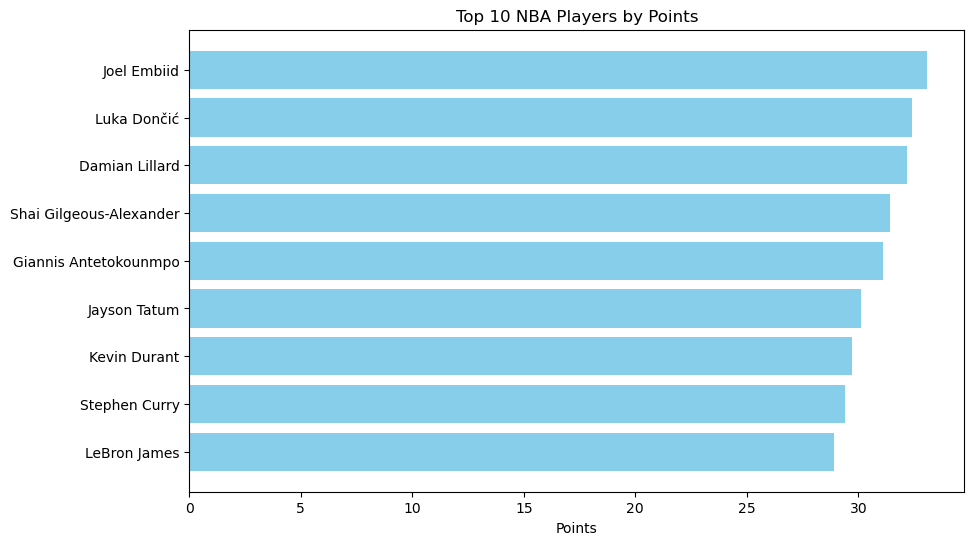

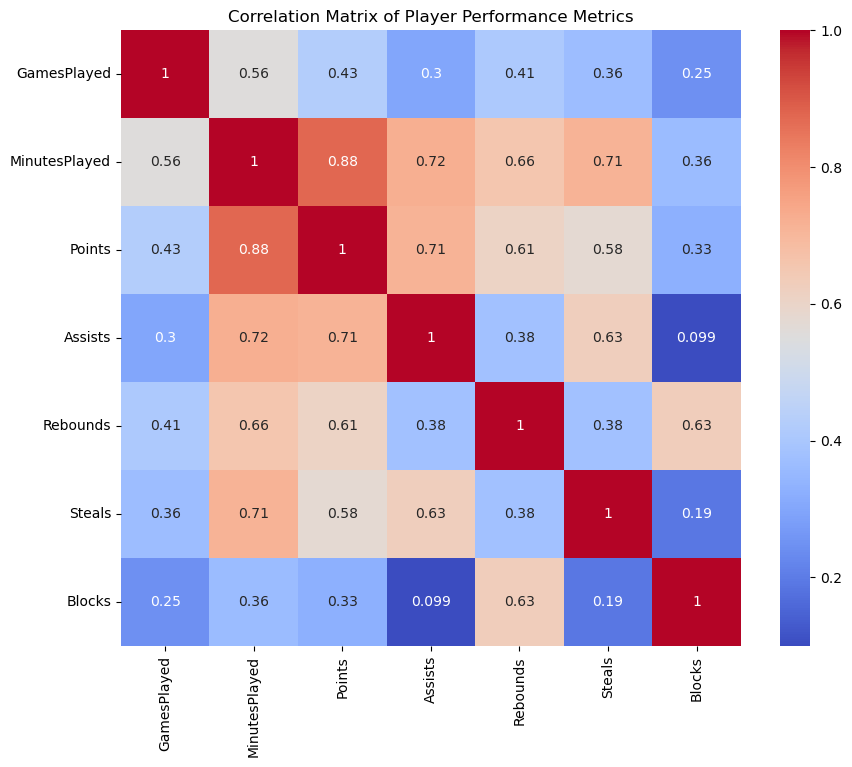

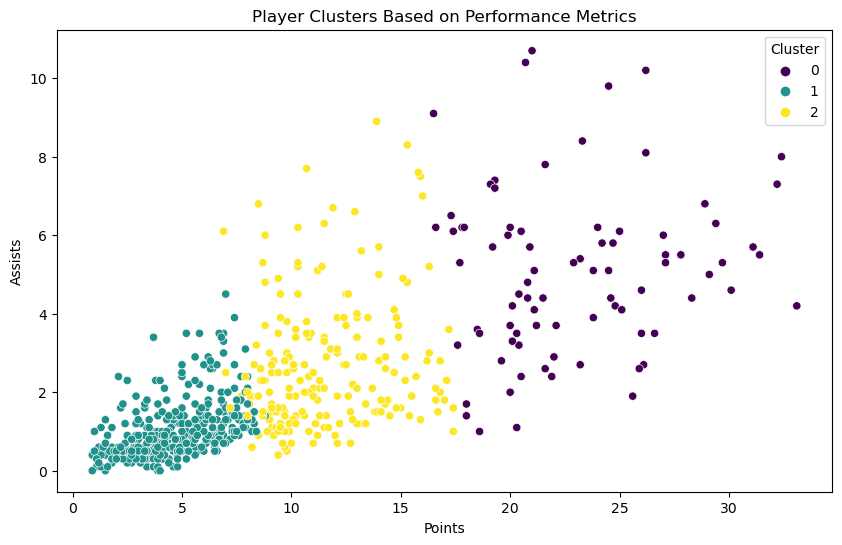

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Loading the dataset
url = "C:/Users/Tarush Tarang/Desktop/projects/sports analytics/nba_2022_2023.csv"
data = pd.read_csv(url)

# Display the first few rows of the dataset
print(data.head())

# Basic data cleaning
data.dropna(inplace=True)  # Remove missing values
data = data[data['MinutesPlayed'] > 0]  # Filter out players with zero minutes played

# Selecting relevant columns
select_columns = ['Player', 'Team', 'GamesPlayed', 'MinutesPlayed', 'Points', 'Assists', 'Rebounds', 'Steals', 'Blocks']
data = data[select_columns]

print(data.info())

# Summary statistics
print(data.describe())

# Top 10 players by points
top_scorers = data.sort_values(by='Points', ascending=False).head(10)
print(top_scorers[['Player', 'Points']])

# Exclude non-numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Correlation matrix
correlation_matrix = numeric_data.corr()
print(correlation_matrix)

# Top 10 players graph by points
plt.figure(figsize=(10, 6))
plt.barh(top_scorers['Player'], top_scorers['Points'], color='skyblue')
plt.xlabel('Points')
plt.title('Top 10 NBA Players by Points')
plt.gca().invert_yaxis()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Player Performance Metrics')
plt.show()

# Clustering players
features = data[['Points', 'Assists', 'Rebounds', 'Steals', 'Blocks']]
kmeans = KMeans(n_clusters=3, n_init=10)
data['Cluster'] = kmeans.fit_predict(features)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Points', y='Assists', hue='Cluster', palette='viridis')
plt.title('Player Clusters Based on Performance Metrics')
plt.show()